# ARIMA Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

In [2]:
df_airline=pd.read_csv('C:/Users/nisar/Desktop/udemy/Simplilearn/Course Material/Machine_Learning_ILT_June_2022/Community Forum data/Live-Time-Series-main/Live-Time-Series-main/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

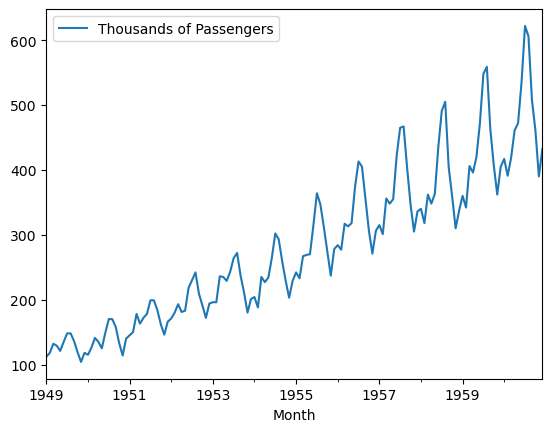

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adf_test(series):
    result=adfuller(series)
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

p- value: 0.9918802434376411
weak evidence against null hypothesis, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

p- value: 0.054213290283824954
weak evidence against null hypothesis, indicating it is non-stationary 


In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


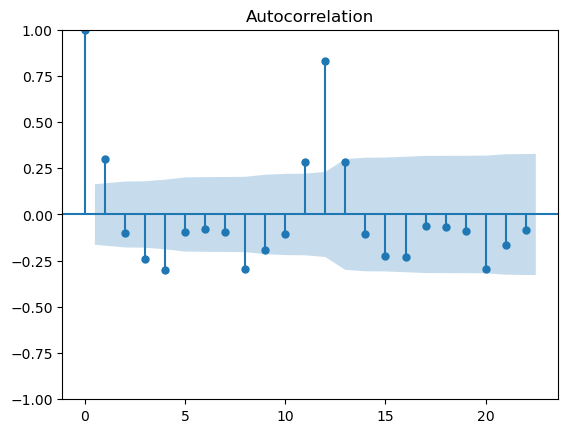

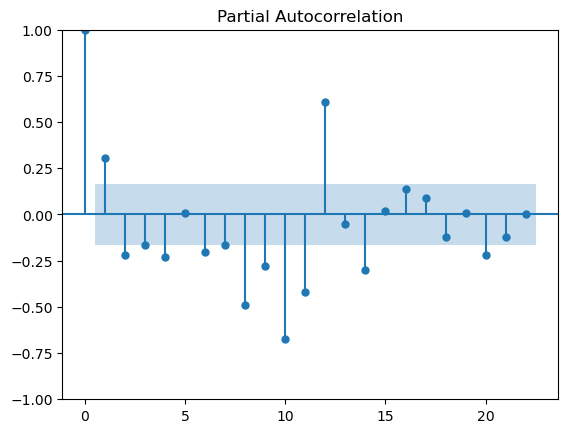

In [21]:
acf = plot_acf(df_airline["Passengers First Difference"].dropna())
pacf = plot_pacf(df_airline["Passengers First Difference"].dropna())

In [22]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [23]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [24]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [25]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [26]:
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [27]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [28]:
test_data

,Thousands of Passengers,Passengers First Difference
Month,,
1956-01-01,284.0,6.0
1956-02-01,277.0,-7.0
1956-03-01,317.0,40.0
1956-04-01,313.0,-4.0
1956-05-01,318.0,5.0
1956-06-01,374.0,56.0
1956-07-01,413.0,39.0
1956-08-01,405.0,-8.0
1956-09-01,355.0,-50.0


In [29]:
## create a ARIMA model
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [30]:
train_data

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1955-08-01,347.0,-17.0
1955-09-01,312.0,-35.0
1955-10-01,274.0,-38.0


In [31]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(14,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
model_Arima_fit=model_ARIMA.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
test_data

,Thousands of Passengers,Passengers First Difference
Month,,
1956-01-01,284.0,6.0
1956-02-01,277.0,-7.0
1956-03-01,317.0,40.0
1956-04-01,313.0,-4.0
1956-05-01,318.0,5.0
1956-06-01,374.0,56.0
1956-07-01,413.0,39.0
1956-08-01,405.0,-8.0
1956-09-01,355.0,-50.0


In [34]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [35]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [36]:
pred

1956-01-01    284.664294
1956-02-01    278.104136
1956-03-01    301.286674
1956-04-01    306.915573
1956-05-01    308.476303
1956-06-01    351.810381
1956-07-01    396.663854
1956-08-01    376.300561
1956-09-01    342.988196
1956-10-01    308.381634
1956-11-01    276.838530
1956-12-01    310.550958
1957-01-01    320.250923
1957-02-01    308.287018
1957-03-01    328.103987
1957-04-01    335.513471
1957-05-01    340.441896
1957-06-01    382.584354
1957-07-01    427.349356
1957-08-01    403.542783
1957-09-01    372.122337
1957-10-01    339.670786
1957-11-01    312.361541
1957-12-01    341.676850
1958-01-01    351.683103
1958-02-01    337.219741
1958-03-01    351.785260
1958-04-01    363.218514
1958-05-01    369.130634
1958-06-01    412.025988
1958-07-01    454.148296
1958-08-01    429.683273
1958-09-01    398.052374
1958-10-01    369.645335
1958-11-01    344.999578
1958-12-01    371.012680
1959-01-01    380.369085
1959-02-01    363.906889
1959-03-01    373.928492
1959-04-01    388.719738


In [37]:
residuals

Month
1956-01-01     -0.664294
1956-02-01     -1.104136
1956-03-01     15.713326
1956-04-01      6.084427
1956-05-01      9.523697
1956-06-01     22.189619
1956-07-01     16.336146
1956-08-01     28.699439
1956-09-01     12.011804
1956-10-01     -2.381634
1956-11-01     -5.838530
1956-12-01     -4.550958
1957-01-01     -5.250923
1957-02-01     -7.287018
1957-03-01     27.896013
1957-04-01     12.486529
1957-05-01     14.558104
1957-06-01     39.415646
1957-07-01     37.650644
1957-08-01     63.457217
1957-09-01     31.877663
1957-10-01      7.329214
1957-11-01     -7.361541
1957-12-01     -5.676850
1958-01-01    -11.683103
1958-02-01    -19.219741
1958-03-01     10.214740
1958-04-01    -15.218514
1958-05-01     -6.130634
1958-06-01     22.974012
1958-07-01     36.851704
1958-08-01     75.316727
1958-09-01      5.947626
1958-10-01    -10.645335
1958-11-01    -34.999578
1958-12-01    -34.012680
1959-01-01    -20.369085
1959-02-01    -21.906889
1959-03-01     32.071508
1959-04-01      7.2

<AxesSubplot:xlabel='Month'>

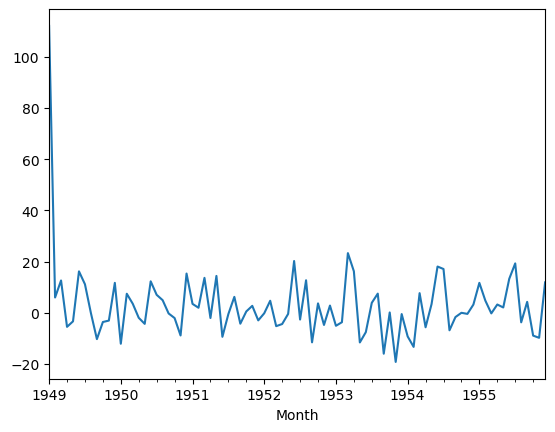

In [38]:
model_Arima_fit.resid.plot()

In [40]:
test_data['Predicted_ARIMA']=pred

C:\Users\nisar\AppData\Local\Temp\ipykernel_11092\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

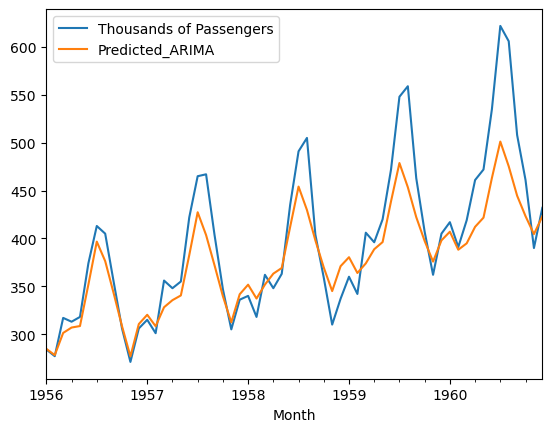

In [41]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [42]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [43]:
df_airline.tail()

,Thousands of Passengers,Passengers First Difference
Month,,
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0
1960-11-01,390.0,-71.0
1960-12-01,432.0,42.0


In [44]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_airline.index[-1]+ DateOffset(months=x)for x in range(0,25)]

In [45]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_airline.columns)

In [46]:
future_datest_df.head()

,Thousands of Passengers,Passengers First Difference
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN


In [47]:
future_datest_df.tail()

,Thousands of Passengers,Passengers First Difference
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN
1962-12-01,NaN,NaN


In [48]:
future_df=pd.concat([df_airline,future_datest_df])

<AxesSubplot:>

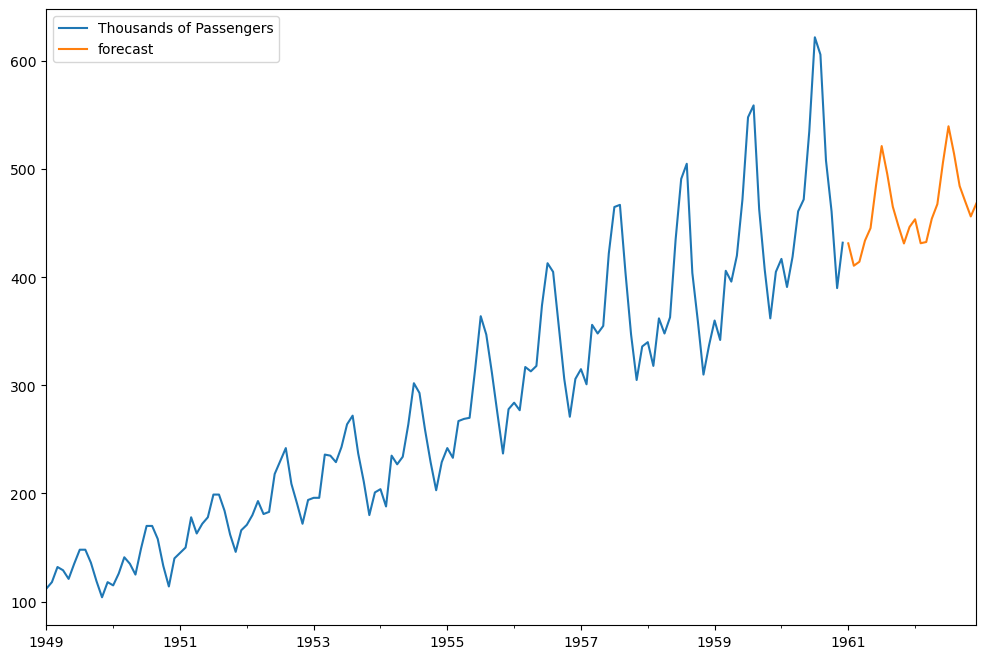

In [49]:
future_df['forecast']=model_Arima_fit.predict(start='1961-01-01',end='1962-12-01')
future_df[['Thousands of Passengers', 'forecast']].plot(figsize=(12, 8)) 